   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 72.2 MB/s eta 0:00:00


[_add_readme_to_default_data_locations] Added README.md to /root/nilearn_data

[get_dataset_dir] Dataset created in /root/nilearn_data/adhd

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7781/adhd40_metadata.tgz ...

[fetch_single_file]  ...done. (0 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/adhd/fbef5baff0b388a8c913a08e1d84e059/adhd40_metadata.tgz...

[uncompress_file] .. done.

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/7782/adhd40_0010042.tgz ...

[_chunk_report_] Downloaded 18595840 of 44414948 bytes (41.9%%,    1.4s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from 
/root/nilearn_data/adhd/e7ff5670bd594dcd9453e57b55d69dc9/adhd40_0010042.tgz...

[uncompress_file] .. done.

[get_dataset_dir] Dataset created in /root/nilearn_data/fsl

[fetch_single_file] Downloading data from https://www.nitrc.org/frs/download.php/9902/HarvardOxford.tgz ...

[_chunk_report_] Downloaded 16924672 of 25716861 bytes (65.8%%,    0.5s remaining)

[fetch_single_file]  ...done. (2 seconds, 0 min)

[uncompress_file] Extracting data from /root/nilearn_data/fsl/5c734f16e50cc772ef593cab9bb3137b/HarvardOxford.tgz...

[uncompress_file] .. done.

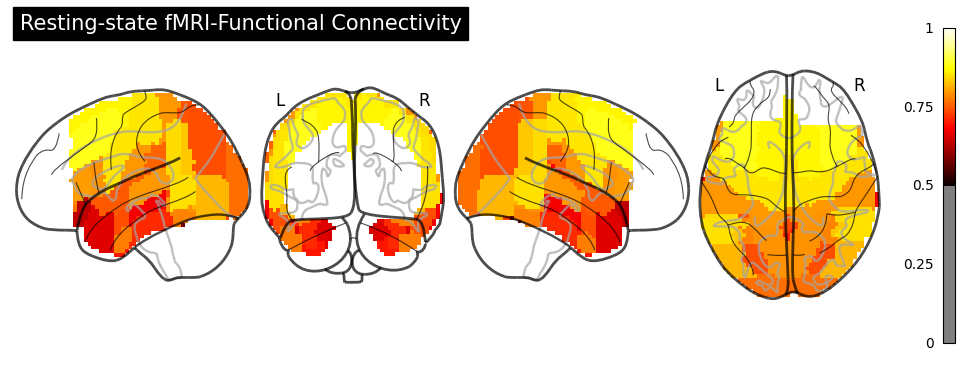

In [4]:
!pip install nilearn matplotlib numpy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, plotting
from nilearn.connectome import ConnectivityMeasure

# Load a sample fMRI dataset from Nilearn
dataset = datasets.fetch_adhd(n_subjects=1)
fmri_filename = dataset.func[0]  # Path to the fMRI data

# Extract time series from regions of interest (ROIs)
from nilearn.input_data import NiftiLabelsMasker
# Load the Harvard-Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = atlas.maps
labels = atlas.labels

# Extract time series from the atlas regions
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
                           memory='nilearn_cache', verbose=0)
time_series = masker.fit_transform(fmri_filename)

# Compute functional connectivity (correlation matrix)
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the connectivity matrix on a glass brain
plotting.plot_glass_brain(
    masker.inverse_transform(correlation_matrix[0]),  # Use the first ROI's connectivity
    title='Resting-state fMRI-Functional Connectivity',
    display_mode='lyrz',  # 'lyrz' for sagittal (l), coronal (y), and axial (z) views
    colorbar=True,
    cmap='cold_hot',
    threshold=0.5  # Threshold for displaying connections
)

# Show the plot
plt.show()

[get_dataset_dir] Dataset found in /root/nilearn_data/icbm152_2009

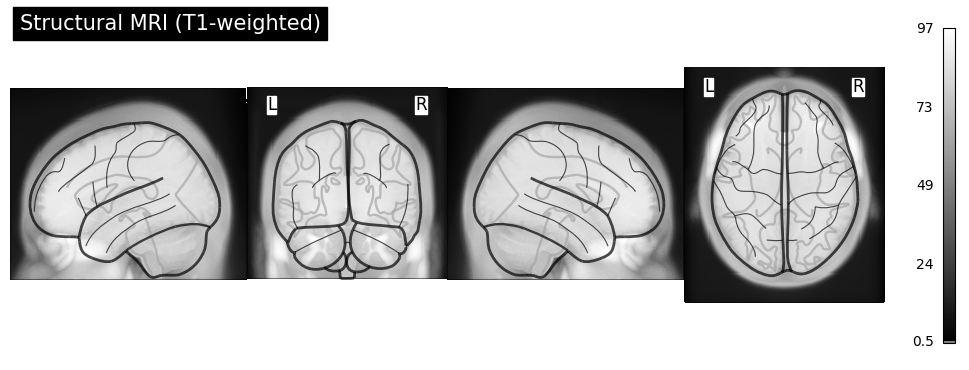

In [6]:
!pip install nilearn matplotlib numpy

import matplotlib.pyplot as plt
from nilearn import datasets, plotting

# Load a sample structural (T1-weighted) MRI dataset from Nilearn
dataset = datasets.fetch_icbm152_2009()
t1_filename = dataset.t1  # Path to the T1-weighted MRI data

# Plot the structural MRI data on a glass brain
plotting.plot_glass_brain(
    t1_filename,  # Path to the T1-weighted MRI data
    title='Structural MRI (T1-weighted)',
    display_mode='lyrz',  # 'lyrz' for sagittal (l), coronal (y), and axial (z) views
    colorbar=True,
    cmap='gray',  # Use grayscale colormap for structural data
    threshold=0.5  # Adjust threshold to highlight brain structures
)

# Show the plot
plt.show()

In [7]:
!pip install nilearn matplotlib numpy

# Import libraries
import matplotlib.pyplot as plt
from nilearn import datasets, plotting

# Load a sample diffusion MRI dataset from Nilearn
# For this example, we'll use a dataset that includes an FA map
dataset = datasets.fetch_haxby_simple()
fa_filename = dataset.fa  # Path to the fractional anisotropy (FA) map

# Plot the diffusion MRI data (FA map) on a glass brain
plotting.plot_glass_brain(
    fa_filename,  # Path to the FA map
    title='Diffusion MRI (FA Map)',
    display_mode='lyrz',  # 'lyrz' for sagittal (l), coronal (y), and axial (z) views
    colorbar=True,
    cmap='viridis',  # Use a colormap suitable for FA maps
    threshold=0.2  # Adjust threshold to highlight white matter tracts
)

# Show the plot
plt.show()



AttributeError: module 'nilearn.datasets' has no attribute 'fetch_haxby_simple'